In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


Καλούμε την read των pandas

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Ξεκινάμε με τις γνωστές στατιστικές που μας εμφανίζει η describe

In [ ]:
stats = df.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Εδω με την βιβλιοθήκη matplot φτιάχνω τα ιστογραμματα

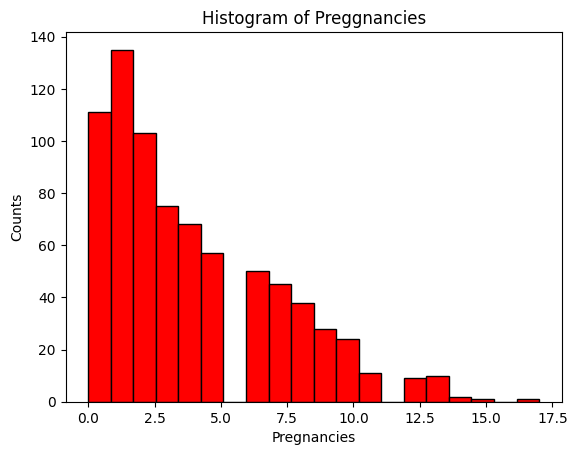

In [ ]:
plt.title('Histogram of Preggnancies')
plt.hist(df['Pregnancies'], bins=20, color = 'red', edgecolor='black')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()


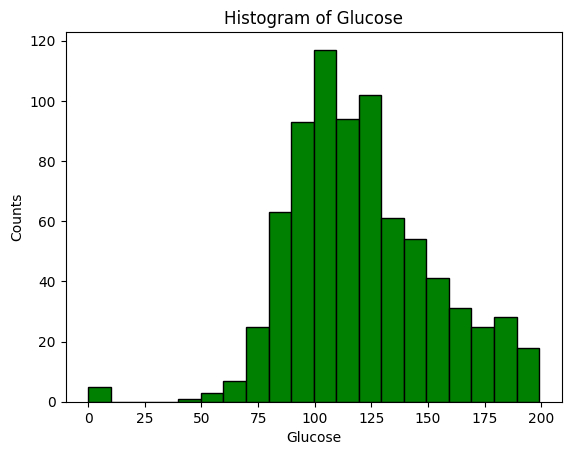

In [ ]:
plt.title('Histogram of Glucose')
plt.hist(df['Glucose'], bins=20, color = 'green', edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()


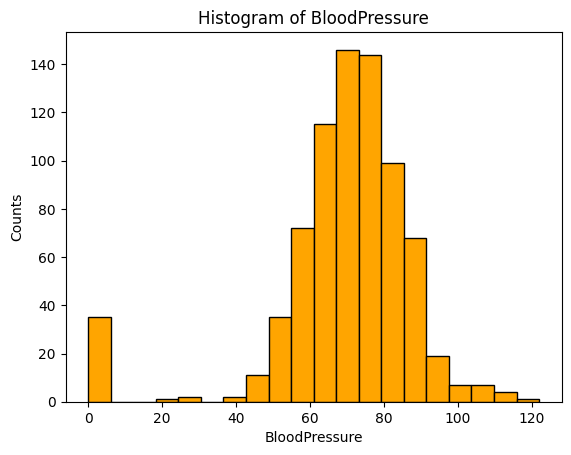

In [ ]:
plt.title('Histogram of BloodPressure')
plt.hist(df['BloodPressure'], bins=20, color = 'orange', edgecolor='black')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

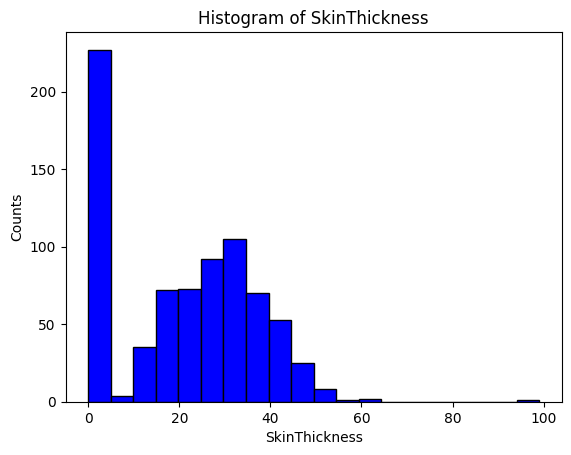

In [ ]:
plt.title('Histogram of SkinThickness')
plt.hist(df['SkinThickness'], bins=20, color = 'blue', edgecolor='black')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

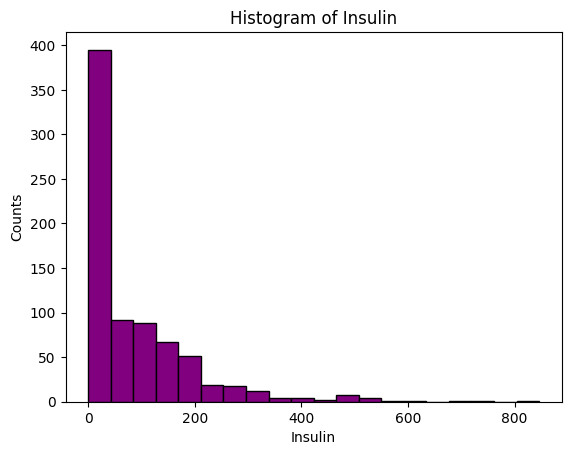

In [ ]:
plt.title('Histogram of Insulin')
plt.hist(df['Insulin'], bins = 20, color = "purple", edgecolor = "black")
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

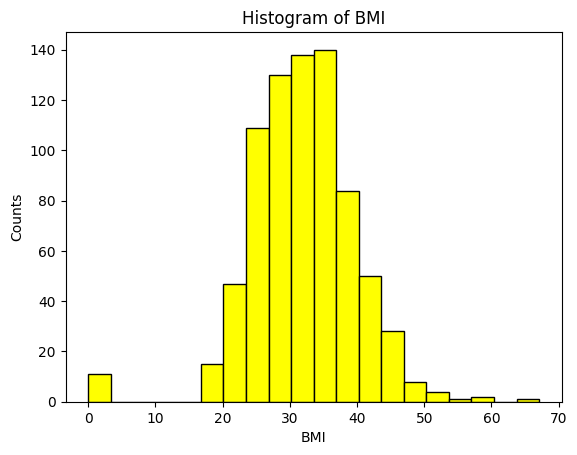

In [ ]:
plt.title('Histogram of BMI')
plt.hist(df['BMI'], bins = 20, color = "yellow", edgecolor = "black")
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

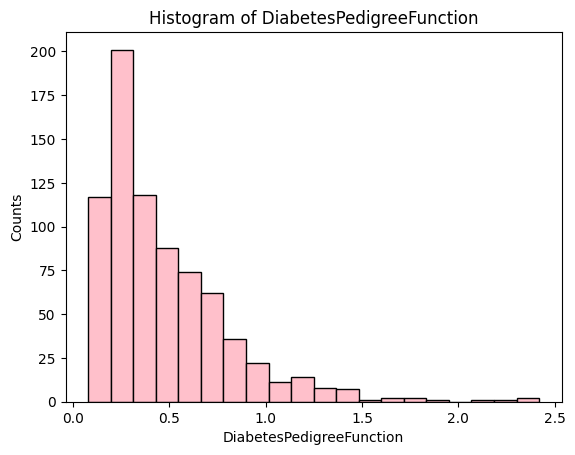

In [ ]:
plt.title('Histogram of DiabetesPedigreeFunction')
plt.hist(df['DiabetesPedigreeFunction'], bins = 20, color = "pink", edgecolor = "black")
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

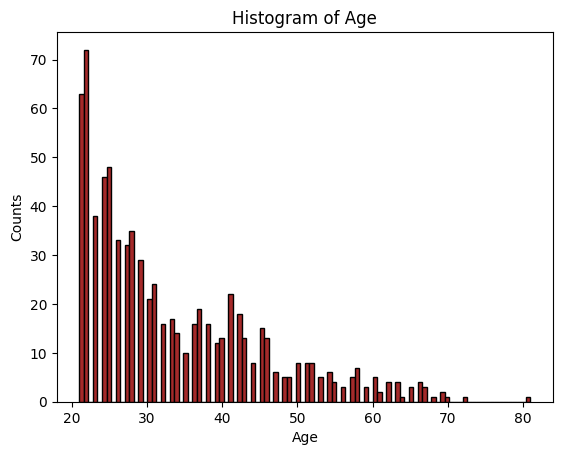

In [ ]:
plt.title('Histogram of Age')
plt.hist(df['Age'], bins = 100, color = "brown", edgecolor = "black")
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

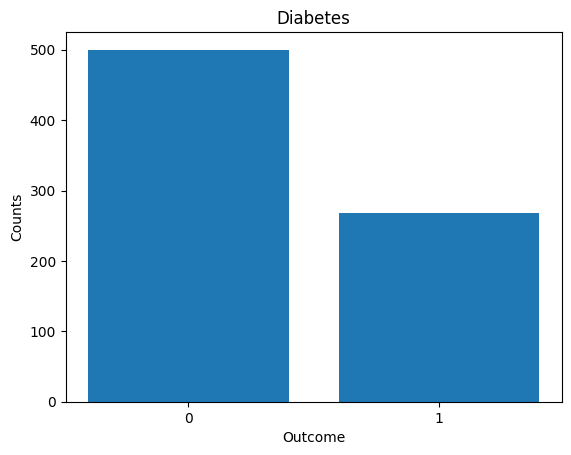

In [ ]:
count_outcome = df['Outcome'].value_counts()
labels = count_outcome.index
values = count_outcome.values
plt.title('Diabetes')
plt.bar(labels, values)
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.xticks(labels)
plt.show()

**ΕΡΩΤΗΜΑ 2 ΚΑΙ 3** .H ποιότητα των δεδομένων την θεωρώ πραγματική απλά πιστεύω ότι έχει σημαντικές παραλήψεις. Από τον μεσο όρο των γεννήσεων πάνω από 3 θεωρώ ότι το δείγμα πάρθηκε από γυναίκες που μπορεί να ήταν ιατρικός στόχος αλλά δεν το γνωρίζουμε. Επίσης παρατηρώ 268 Διαβητηκούς σε δείγμα 768 ατόμων το οποίο το θεωρώ υπερβολικά υψηλό λογικά το δείγμα πάρθηκε από όμάδα ατόμων με υψηλές πιθανότητες να έχουν διαβήτη. Σχετικά με το Ερώτημα 3 βλέπω αν κάνω το bin = 100 πολλές παρατηρήσεις στα αριστερά στις ηλικίες 20-30 άρα θα έλεγα ότι εμφανίζει ουρά προς τα δεξιά ή skew. Παρακάτω αναλύω λίγο ακόμα το ερώτημα 3

In [ ]:
#Η τιμή αυτή δίχει ασυμμετρία επειδή έχει απόκλιση από το 0 μαλιστα αρκετή απόκλιση επομένως πρέπει να προσέξω στο μοντέλο
print(df['Age'].skew())

1.1295967011444805


In [ ]:
corr = df['Glucose'].corr(df['Outcome'])
print("Συσχέτιση", corr)

Συσχέτιση 0.46658139830687295


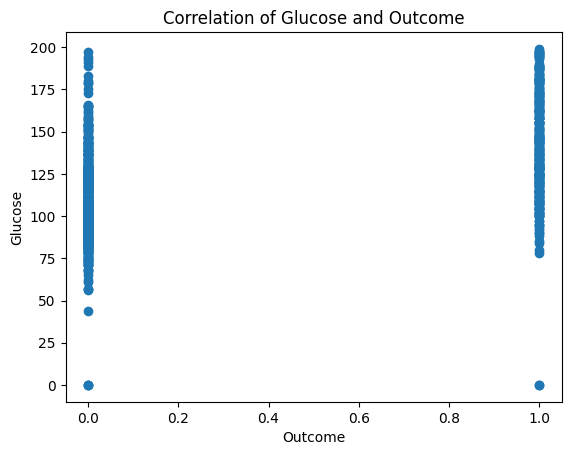

In [ ]:
#Λόγο διαδυκότητας δεν φαίνεται η συσχέτιση των δεδομένων παρόλα αυτά αφήνω τον κώδικα εδώ
plt.title('Correlation of Glucose and Outcome')
plt.scatter(df['Outcome'],df['Glucose'])
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

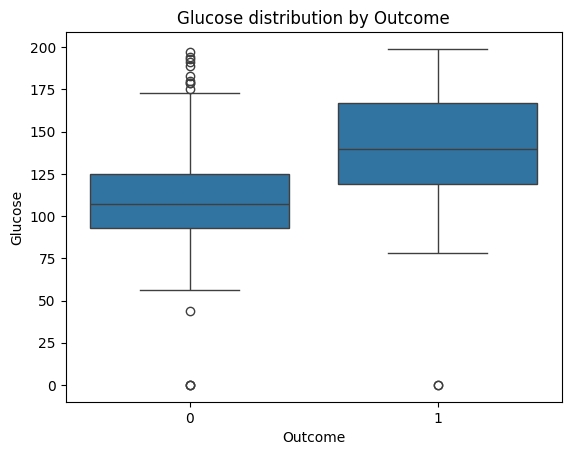

In [ ]:
#Εδώ με την διασπορά φαίνεται καλύτερα βλέπουμε 90-120 (καλες τιμές) 125-165 (τιμές κινδύνου) επίσης μαθηματικά μπορούμε στα υπάρχον δεδομένα να κάνουμε Logistic regression
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


Ξεκινάμε την κατασκευή μοντέλου λογιστικής παλινδρόμησης με δυαδικό αποτέλεσμα

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = np.array(input_df)
y = np.array(targets_df)
x.shape, y.shape

((768, 8), (768,))

In [ ]:
#Το seed και testsize ορίζονται εδώ μόνο μια φορά για όλα τα ερωτήματα (σαν global variables) άρα για να τρέξουν όλα τα κελιά πρέπει να τρέξει αυτό
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)


In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
y_train_pred = model.predict(x_train)
y_train_pred
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy_percentage = round(train_accuracy * 100, 2)

print(f"Train Accuracy: {train_accuracy_percentage}%")


Train Accuracy: 76.54%


In [ ]:
#Λόγο του test size μεγαλύτερο από το παράδειγμα κώδικα χάνει λίγο accuracy το μοντέλο αλλά είναι σωστό και λογικό το δοκίμασα και με 0.1 split και δίνει ακριβώς το ίδιο με το παράδειγμα
accuracy = accuracy_score(y_test, y_predict)
accuracy_percentage = round(accuracy*100, 2)

print(f"The accuracy of the model is: {accuracy_percentage}%")
#Απλά το κρατάω για τα πολλά decimal για να δώ αν αλλάζει έστω ελάχιστα σε δοκιμές
print("Accuracy", accuracy_score(y_test, y_predict))


The accuracy of the model is: 77.92%
Accuracy 0.7792207792207793


Παρατηρούμε μικρή διαφορά στα ποσοστά train και test που θεωρείται καλό η διαφορά προκύπτει λογικά υπάρχει μια μικ´ρη τυχαιότητα στην διακύμαση εξαιτίας του split και το random μπορεί να τυχαίνει να έδωσε λίγο ευκολότερα δεδομένα στο test παρόλα αυτά είναι πολύ καλό σημάδι.

Age [1,26): n=90, accuracy = 85.56%


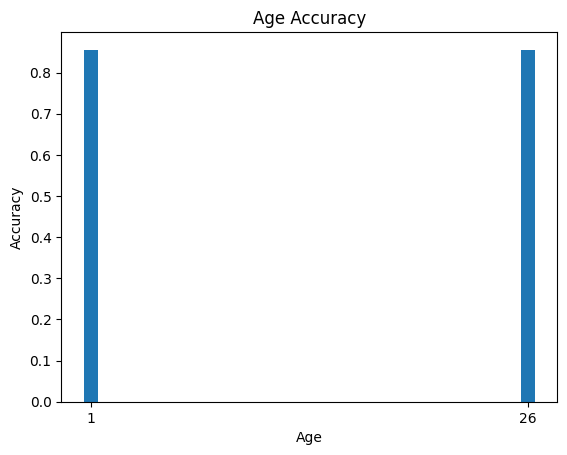

Age [26,51): n=120, accuracy = 70.00%


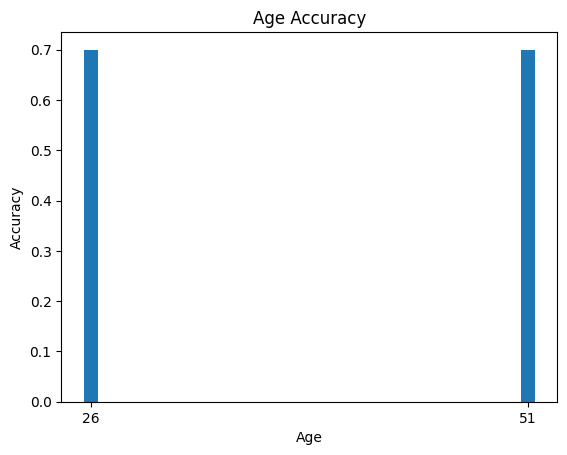

Age [51,76): n=21, accuracy = 90.48%


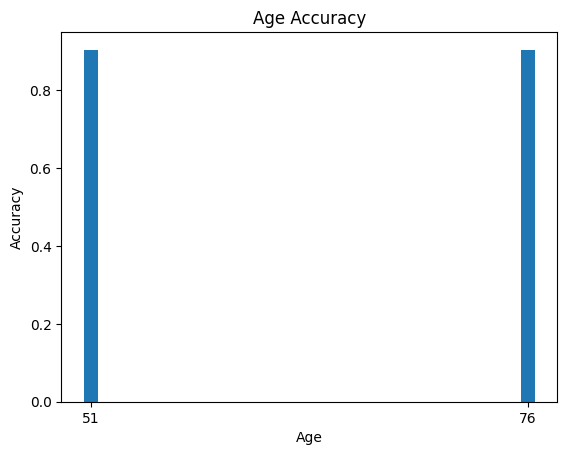

In [ ]:
# Προβλεψη για διαφορετικές ηλικίες το διάγραμμα αν και θα φανεί λάθος δεν είναι δοκίμκασα παρα πολλούς τρόπους και όλοι χάνουν λεπτομέρεια στην απεικόνηση και δοκίμασα και start + end /2 αλλά δεν κρατάει καλά τα όρια
age_index = 7
for start in range(1, 76, 25):
    end = start + 25
    mask = (x_test[:, age_index] >= start) & (x_test[:, age_index] < end)

    X_bin = x_test[mask]
    y_bin = y_test[mask]

    y_pred_bin = model.predict(X_bin)
    acc = accuracy_score(y_bin, y_pred_bin)
    print(f"Age [{start},{end}): n={len(y_bin)}, accuracy = {acc*100:.2f}%")
    plt.title('Age Accuracy')
    plt.bar([start,end], acc)
    plt.xlabel('Age')
    plt.ylabel('Accuracy')
    plt.xticks([start,end])
    plt.show()


Δύο πράγματα μπορούμε να σκεφτούμε ή ότι δεν είναι ίδιο accuracy λόγο μεγαλης διαφοράς στον αριθμό των παρατηρήσεων η ότι το Age είναι μη γραμμικό κατά πολύ σε σχέση με το outcome θεωρητικά μπορούμε να κάνουμε πολλά Χ για κάθε ηλικιακό εύρος και αν ένα ευρος έχει λίγες παρατηρήσεις n<30(από βιβλίο στατιστικής) θα τα συγχώνευα αλλά το καλύτερο θα ήταν κανονική κατανομή για μεταβλητή Age με συλλογή επιπλέον δεδομένων στις ηλικίες που δεν έχουμε πολλές παρατηρήσεις.Μια άλλη ιδέα είναι ο γραμμικός μετασχηματισμός δλδ Age τετράγωνο ή η επιρροή του μαζί με άλλες μεταβλητές στο Y δλδ ένωση μεταβλητών σε μια ανάλογα με coef.

Ερώτημα 8: Δεν θέλουμε σε ιατρικά προβλήματα να κάνουμε πρόβλεψη ότι δεν έχει Διαβήτη κάποιος και να έχει. Στην στατιστική κάνουμε πολύ αυστηρό το α στο ml μετράμε το recall Recall=TP/FN+TP​  και μπορούμε να βάλουμε όρια στο μοντέλο τώρα το πώς να επιλέξουμε σωστό όριο για να μην θυσιάσουμε πολύ ακρίβεια θέλει ROC curve που θα μας δείξει το καλύτερο threshold πιστεύω σε ιατρική εφαρμογή θα το έκανα σίγουρα και ας έχανα accuracy.

In [ ]:

total_accuracy = np.array([])
for i in range(0,10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_predict = model.predict(x_test)
  seed += 1
  accuracy = accuracy_score(y_test, y_predict)
  accuracy_percentage = round(accuracy*100, 2)

  print(f'The accuracy of the model is: {accuracy_percentage}')

  total_accuracy = np.append(total_accuracy, accuracy)
  print("Accuracy", accuracy_score(y_test, y_predict))



The accuracy of the model is: 77.92
Accuracy 0.7792207792207793
The accuracy of the model is: 78.35
Accuracy 0.7835497835497836
The accuracy of the model is: 74.89
Accuracy 0.7489177489177489
The accuracy of the model is: 75.32
Accuracy 0.7532467532467533
The accuracy of the model is: 80.95
Accuracy 0.8095238095238095
The accuracy of the model is: 78.35
Accuracy 0.7835497835497836
The accuracy of the model is: 76.62
Accuracy 0.7662337662337663
The accuracy of the model is: 77.92
Accuracy 0.7792207792207793
The accuracy of the model is: 77.92
Accuracy 0.7792207792207793
The accuracy of the model is: 74.46
Accuracy 0.7445887445887446


In [ ]:
print("Τυπική απόκλιση:", np.std(total_accuracy))
print("Μέση τιμή:", np.mean(total_accuracy))
print(total_accuracy)

Τυπική απόκλιση: 0.018695084746051253
Μέση τιμή: 0.7727272727272727
[0.77922078 0.78354978 0.74891775 0.75324675 0.80952381 0.78354978
 0.76623377 0.77922078 0.77922078 0.74458874]


In [ ]:
#Βρηκα στο preprocessing of data search της sclearn αυτή τη lib το x είναι df input - outcome από πάνω οπότε το έβαλα έτσι
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(x)

print("Normalized Data (Min-Max Scaling):")
print(normalized_data)



Normalized Data (Min-Max Scaling):
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [ ]:
feature_names = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
coefs = list(model.coef_[0])
pairs = list(zip(feature_names, coefs))
top3 = sorted(pairs, key=lambda p: abs(p[1]), reverse=True)[:3]
print(top3)

for name, val in top3:
  if val>0: print("Positive Relation with Y")
  else: print("Negative Relation with Y")



[('DiabetesPedigreeFunction', np.float64(0.9644226103798162)), ('Pregnancies', np.float64(0.1320967858143566)), ('BMI', np.float64(0.1032295466392284))]
Positive Relation with Y
Positive Relation with Y
Positive Relation with Y


ΜΕΡΟΣ 2

Λύνω το ερώτημα 1 ίδια ακριβώς λογική με το μερος 1 απλά liniar

In [ ]:
input_second_df = df.drop(columns=['Outcome','SkinThickness', 'Insulin', 'DiabetesPedigreeFunction','Glucose'])
targets_second_df = df['Glucose']

x_second = np.array(input_second_df)
y_second  = np.array(targets_second_df)
x_second.shape, y_second.shape

((768, 4), (768,))

In [ ]:


x_second_train, x_second_test, y_second_train, y_second_test = train_test_split(x_second, y_second, test_size=test_size, random_state=seed)
x_second_train.shape, y_second_train.shape, x_second_test.shape, y_second_test.shape

((537, 4), (537,), (231, 4), (231,))

In [ ]:
model_second = LinearRegression(fit_intercept=True)

In [ ]:
model_second.fit(x_second_train, y_second_train)

LinearRegression()

In [ ]:
y_predict_second = model_second.predict(x_second_test)
y_predict_second

array([124.21054794, 122.76985805, 139.39891245, 105.10449389,
       118.52780965, 104.27511111, 108.37577803, 129.89513199,
       121.01827473, 139.01983878, 113.11713756, 120.22658826,
       153.03921937, 136.36139811, 119.30016545, 137.64457866,
       124.36578714, 112.11538647, 126.98774906, 121.40015413,
       123.71676953, 129.21648431, 154.87180242, 128.40563354,
       130.16040547, 124.99809496, 141.65120501, 132.63563805,
       120.90647241, 127.05207168, 107.3490296 , 111.86717277,
       103.21186134, 120.12720869, 120.93504152, 107.87850182,
       120.1658789 , 115.73863812, 127.52400466, 108.07387841,
       132.0748376 , 105.91551989, 135.73475217, 136.46976234,
       125.11544843, 142.0159046 , 142.39256026, 104.51566451,
       121.20115493, 120.1320402 , 105.02613374, 138.83681984,
       131.15925456, 122.86720727, 134.18801931, 116.32741708,
       107.51658033, 136.06280734, 116.44195546, 106.68988325,
       112.52454968, 124.20570729, 101.62145152, 126.47

In [ ]:

mae = mean_absolute_error(y_second_test, y_predict_second)
rmse = np.sqrt(mean_squared_error(y_second_test, y_predict_second))
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

MAE: 22.45 | RMSE: 29.76


Το MAE είναι πιο αποτελεμσατικό για μέση ακρίβεια αν είχαμε μεγάλα λάθη ίσως το rmse να ήταν καλύτερο γιατί τα τετραγωνίζει. Εδώ όμως το mae ερμηνεύεται καλύτερα η Γλυκόζη δεν έχει πολλά outliers και δίνει καλή εικόνα για την γενική ακρίβεια άρα την προτιμάω για αυτή την άσκηση

In [ ]:
#Μικρή βελτίωση στο μοντέλο άρα μάλλον δεν είναι γραμμικό ταιριάζει σε κάποιο άλλο αλγόριθμο παρόλα αυτά τα δεδομένα μοιάζουν καθαρά
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]

for i in alphas:
  model_Lasso = Lasso(alpha=i, max_iter=1000)
  model_Lasso.fit(x_second_train, y_second_train)
  y_predict_Lasso = model_Lasso.predict(x_second_test)
  mae = mean_absolute_error(y_second_test, y_predict_Lasso)
  rmse = np.sqrt(mean_squared_error(y_second_test, y_predict_Lasso))
  print(f"Alpha: {i} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

Alpha: 0.2 | MAE: 22.44 | RMSE: 29.75
Alpha: 0.4 | MAE: 22.43 | RMSE: 29.74
Alpha: 0.6 | MAE: 22.42 | RMSE: 29.73
Alpha: 0.8 | MAE: 22.40 | RMSE: 29.72
Alpha: 1.0 | MAE: 22.39 | RMSE: 29.71


In [ ]:
feature_names_Lasso = ['Pregnancies','BloodPressure',	'BMI',	'Age']
coefs_Lasso = list(model_Lasso.coef_.ravel())
pairs_Lasso = list(zip(feature_names_Lasso, coefs_Lasso))
Least = min(pairs_Lasso, key=lambda p: abs(p[1]))
print(Least)

('BloodPressure', np.float64(0.06315390815557523))


Για το τελευταίο ερώτημα πρέπει να αφαιρεθεί το BloodPressure

In [ ]:
input_Final_df = df.drop(columns=['Outcome','SkinThickness', 'Insulin', 'DiabetesPedigreeFunction','Glucose', 'BloodPressure'])
targets_Final_df = df['Glucose']

x_Final = np.array(input_Final_df)
y_Final  = np.array(targets_Final_df)
x_Final.shape, y_Final.shape

((768, 3), (768,))

In [ ]:


x_Final_train, x_Final_test, y_Final_train, y_Final_test = train_test_split(x_Final, y_Final, test_size=test_size, random_state=seed)
x_Final_train.shape, y_Final_train.shape, x_Final_test.shape, y_Final_test.shape

((537, 3), (537,), (231, 3), (231,))

In [ ]:
model_Final = LinearRegression(fit_intercept=True)

In [ ]:
model_Final.fit(x_Final_train, y_Final_train)

LinearRegression()

In [ ]:
y_predict_Final = model_Final.predict(x_Final_test)
y_predict_Final

array([124.1035276 , 121.90193411, 140.72262504, 104.92216431,
       118.09566367, 103.81778402, 108.26792101, 130.36646126,
       119.87992794, 138.42418382, 113.52731364, 120.0037203 ,
       151.62131622, 136.60086251, 119.5941481 , 137.04486436,
       121.75759239, 111.34681349, 126.42836947, 121.86378493,
       123.49595047, 129.4256103 , 155.04768074, 128.9743954 ,
       131.03641052, 124.34870857, 142.01235388, 132.48372738,
       125.59616073, 127.27396048, 107.49277708, 112.09337906,
       102.97219301, 119.81265644, 121.26582458, 107.28733308,
       119.72701327, 115.99862898, 127.65631609, 107.99547748,
       131.70168833, 106.33500557, 134.81015704, 136.50056722,
       123.87671828, 142.46415869, 142.03185942, 103.97201451,
       121.25058254, 120.13127814, 104.89735144, 138.26564389,
       130.59200072, 121.54012788, 133.91607417, 115.51919962,
       107.5061134 , 135.98081097, 116.02561956, 105.97161154,
       112.38133661, 123.94557758, 100.88350525, 125.75

In [ ]:
#Πολύ καλό σημάδι με την αφαίρεση το feature δεν αλλάζουν οι μετρικές σημαντικά άρα το μοντέλο είναι σταθερό
mae = mean_absolute_error(y_Final_test, y_predict_Final)
rmse = np.sqrt(mean_squared_error(y_Final_test, y_predict_Final))
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

MAE: 22.47 | RMSE: 29.78


Το μοντέλο δεν άλλαξε σχεδόν καθόλου υπερ ελάχιστα έπεσε η επίδοσή του το οποίο είναι λογικό αλλά έγινε απλούστερο και αν μεταφραζόταν σε εφαρμογή μπορεί να γλύτωνε μια εξέταση που μεταφράζεται σε χρήματα η χρόνο σε περίπτωση δημοσίου επομένως θετική αλλαγή η απομάκρυνση του bloodpressure. Γενικά το γραμμικό μοντέλο δεν περιγράφει και πολύ καλά τα δεδομένα μας ίσως ένα randomforest κάτι καλυτερο σε μη γραμμικότητα αλλά είναι μια αρχή το μοντέλο είναι σταθερό δίνει μια γενική κατεύθυνση τώρα για το 170 επίπεδο γλυκόζης εγώ θα το χαμήλωνα παρακάτω δείχνω γιατί.Θα το έκανα 120 η και 110 πρώτος λόγος η αρχική μας ανάλυση μας δείχνει ότι μετά από την τιμή 120 η πυκνότητα παρατηρήσεων δείχνει outcome 1 αν δεν έχω κάνει καποιο λάθος > 170 δεν προβλέπει καμία τιμή το μοντέλο Liniar άρα η αλλάζουμε μοντέλο ξαναβλέπουμε ή τους λέμε να κατεβάσουν το όριο για ασφάλεια

In [ ]:
#ΔΕΝ ΠΡΟΒΛΕΨΑΜΕ ΚΑΜΙΑ ΤΙΜΗ ΓΛΥΚΌΖΗΣ 170 ΚΑΙ ΠΑΝΩ ΠΟΛΥ ΛΟΓΙΚΌ ΌΤΑΝ είναι ελάχιστες οι τιμές αυτές στα δεδομένα μας άρα θα μείωνα αρκετά την τιμή της γλυκόζης αλλιώς δεν θα δουλέψει η εφαρμογή αυτή
for val in y_predict_Final:
  if val >= 120:
    print(val)
count = len(y_predict_Final)
count_two = len(y_predict_Final[y_predict_Final >= 120])
print(count)
print(count_two)


124.10352759679546
121.90193411397867
140.7226250429493
130.36646125794363
138.42418382343646
120.00372029702356
151.6213162163296
136.6008625145205
137.04486436350066
121.75759239331975
126.4283694707807
121.86378492904724
123.49595046643606
129.42561029585787
155.04768074022536
128.97439539794505
131.03641052242756
124.34870857301948
142.01235387519807
132.48372737797897
125.59616073103045
127.27396048361197
121.26582457904797
127.65631608674275
131.7016883349478
134.81015703940574
136.5005672216127
123.8767182821253
142.4641586909487
142.031859417247
121.25058253719675
120.1312781435702
138.26564388571057
130.59200072168136
121.54012787768104
133.91607417300781
135.98081096542697
123.94557757690734
125.75810226978764
120.05869931124775
121.67512479930849
128.55525237117618
128.80129524656664
143.34036790326965
122.00436115698528
123.17197547856074
123.25979635273441
134.1001528660397
140.69908202685082
123.78331810164102
122.0580243650966
130.79095756487487
145.65690880300764
132.31